# Import Required Libraries

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load PreProcessed Data

In [2]:
data = pd.read_csv(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\data\processed\loan_data_processed.csv")

In [3]:
data.head(5)

,no_of_dependents,education,self_employed,annual_income_in_lakhs,loan_amount_in_lakhs,loan_term_in_months,cibil_score,debt_to_income_ratio,Asset_Score_in_lakhs,loan_status
0,0.4,0.0,0.0,0.969072,0.755102,0.555556,0.666667,0.645833,0.557032,0
1,0.0,1.0,1.0,0.402062,0.303571,0.333333,1.000000,0.590244,0.183832,1
2,0.6,0.0,0.0,0.917526,0.750000,1.000000,1.000000,0.705495,0.634551,1
3,0.6,0.0,0.0,0.824742,0.775510,0.333333,1.000000,0.897561,0.579181,1
4,1.0,1.0,1.0,0.989691,0.609694,1.000000,1.000000,0.387755,0.604651,1


In [4]:
x = data.drop(columns = ["loan_status"], axis = 1)
y = data["loan_status"]

# Train and Ensemble Models

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state = 42)

In [6]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize Ensemble Models

In [7]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoosting': XGBClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression()
}


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       738
           1       0.87      0.98      0.92       543

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281



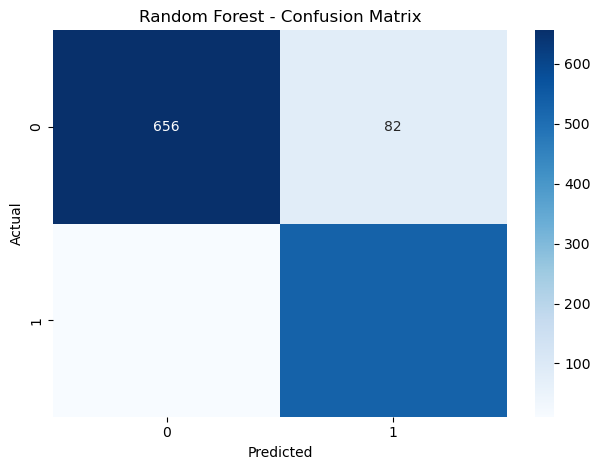


XGBoosting - Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       738
           1       0.88      0.95      0.91       543

    accuracy                           0.92      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.92      0.92      0.92      1281



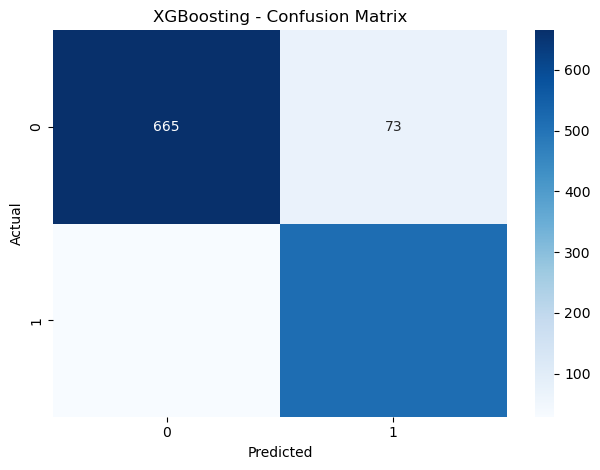


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       738
           1       0.72      0.75      0.73       543

    accuracy                           0.77      1281
   macro avg       0.76      0.77      0.77      1281
weighted avg       0.77      0.77      0.77      1281



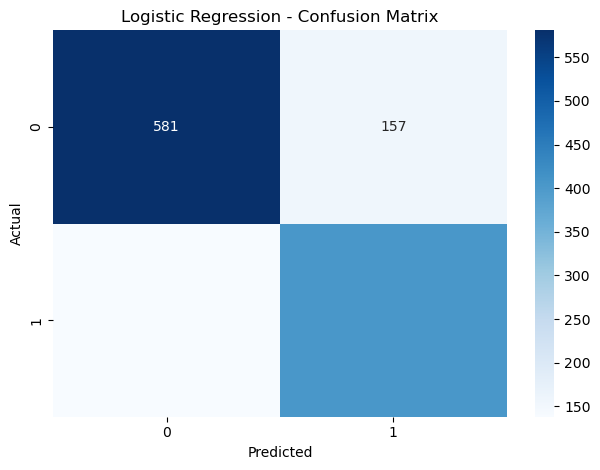

In [8]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)

    # Print performance metrics
    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, preds))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f"C:/Users/Deepak Verma/OneDrive/Documents/Loan_Default_Prediction/outputs/figures/{name}-Confusion_Matrix.png")
    plt.show()

# Visualizations

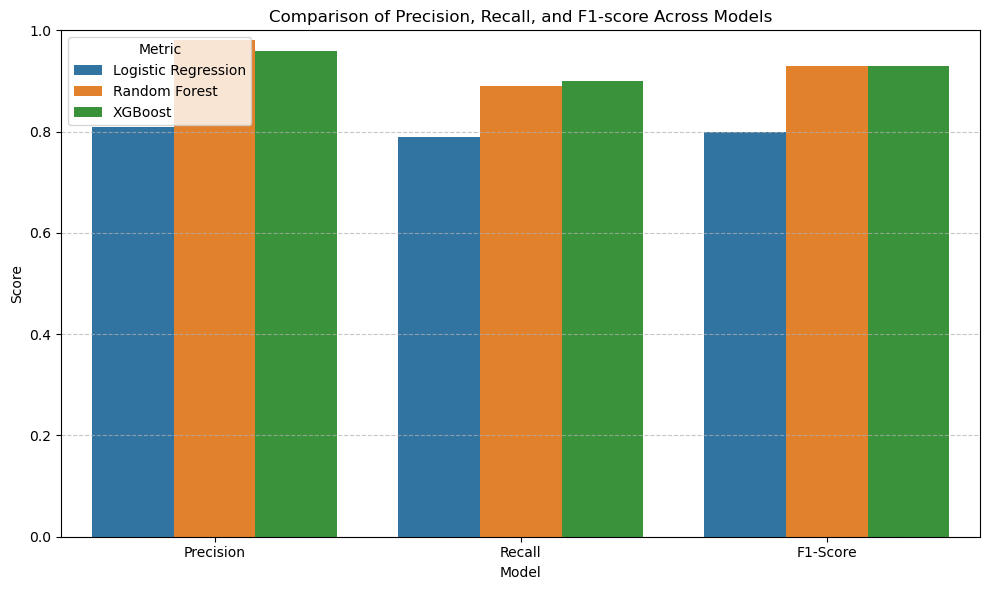

In [9]:
report = {
    'Model': ["Precision", "Recall", "F1-Score"],
    "Logistic Regression": [0.81, 0.79, 0.80],
    "Random Forest": [0.98, 0.89, 0.93],
    "XGBoost": [0.96, 0.90, 0.93]
}

report_data = pd.DataFrame(report)

report_data_melted = report_data.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=report_data_melted)
plt.title('Comparison of Precision, Recall, and F1-score Across Models')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(r"C:/Users/Deepak Verma/OneDrive/Documents/Loan_Default_Prediction/outputs/figures/reports.png")
plt.show()

# Cross Validation Accuracy

In [10]:
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)
    print(f"{name} - CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest - CV Accuracy: 0.9300 ± 0.0109
XGBoosting - CV Accuracy: 0.9229 ± 0.0073
Logistic Regression - CV Accuracy: 0.7707 ± 0.0097


# Save the Trained Models

In [11]:
joblib.dump(models["Random Forest"], r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\rf_model.pkl")

['C:\\Users\\Deepak Verma\\OneDrive\\Documents\\Loan_Default_Prediction\\models\\rf_model.pkl']

In [12]:
joblib.dump(models["XGBoosting"], r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\xgb_model.pkl")

['C:\\Users\\Deepak Verma\\OneDrive\\Documents\\Loan_Default_Prediction\\models\\xgb_model.pkl']

In [13]:
joblib.dump(models["Logistic Regression"], r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\lr_model.pkl")

['C:\\Users\\Deepak Verma\\OneDrive\\Documents\\Loan_Default_Prediction\\models\\lr_model.pkl']